In [1]:
! pip install torch


[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip install transformers


[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import torch

print(torch.__version__)

2.10.0+cpu


In [4]:
import transformers

print(transformers.__version__)

5.1.0


In [5]:
! pip install torch torchvision

  Using cached torchvision-0.25.0-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
Using cached torchvision-0.25.0-cp311-cp311-win_amd64.whl (4.0 MB)
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.0 MB 1.3 MB/s eta 0:00:06
   - -------------------------------------- 0.3/7.0 MB 3.5 MB/s eta 0:00:02
   ------- -------------------------------- 1.3/7.0 MB 10.6 MB/s eta 0:00:01
   ------------ --------------------------- 2.2/7.0 MB 12.9 MB/s eta 0:00:01
   ------------------- -------------------- 3.5/7.0 MB 17.2 MB/s eta 0:00:01
   ------------------------ --------------- 4.2/7.0 MB 16.9 MB/s eta 0:00:01
   ----------------------------- ---------- 5.3/7.0 MB 18.7 MB/s eta 0:00:01
   ----------------------------------- ---- 6.2/7.0 MB 19.0 MB/s eta 0:00:01
   ---------------------------------------  7.0/7.0 MB 19.5 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 17.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
! pip install transformers tokenizers accelerate


[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from accelerate import Accelerator

acc = Accelerator()
print(acc.device)

cpu


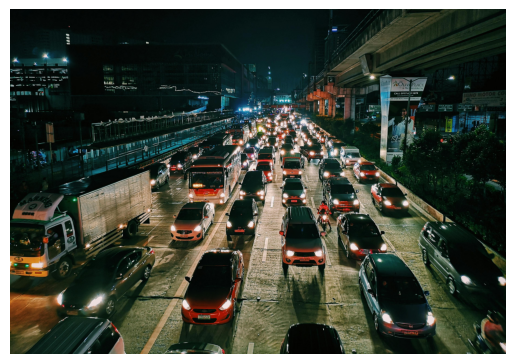

In [30]:
from matplotlib import pyplot as plt
from PIL import Image
import os

path = "images/image_2.jpeg"
img = Image.open(path)

# Display images using matplotlib

plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()

In [1]:
! pip install timm

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   --- ------------------------------------ 0.2/2.6 MB 7.4 MB/s eta 0:00:01
   ------------------- -------------------- 1.3/2.6 MB 15.8 MB/s eta 0:00:01
   ---------------------------------------  2.6/2.6 MB 20.4 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 16.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Import pipeline
from transformers import pipeline
import torch

# Specify the inference task
classifier_image = pipeline(
    task="object-detection", 
    model="facebook/detr-resnet-50"
)

Loading weights:   0%|          | 0/530 [00:00<?, ?it/s]

DetrForObjectDetection LOAD REPORT from: facebook/detr-resnet-50
Key                                                            | Status     |  | 
---------------------------------------------------------------+------------+--+-
model.backbone.model.layer2.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer3.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer4.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer1.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [39]:
# Pass the input to the pipeline
detections = classifier_image(img)

detections[:5]


[{'score': 0.6827951073646545,
  'label': 'car',
  'box': {'xmin': 1904, 'ymin': 922, 'xmax': 2016, 'ymax': 1025}},
 {'score': 0.9888834357261658,
  'label': 'car',
  'box': {'xmin': 346, 'ymin': 1726, 'xmax': 1081, 'ymax': 2286}},
 {'score': 0.5736234188079834,
  'label': 'person',
  'box': {'xmin': 1843, 'ymin': 831, 'xmax': 1948, 'ymax': 942}},
 {'score': 0.8973751068115234,
  'label': 'car',
  'box': {'xmin': 1807, 'ymin': 1124, 'xmax': 1937, 'ymax': 1291}},
 {'score': 0.5430497527122498,
  'label': 'person',
  'box': {'xmin': 1464, 'ymin': 1192, 'xmax': 1555, 'ymax': 1277}}]

In [42]:
def get_labels(object_output):
    format_ouput = ""
    for item in object_output:
        #format_ouput.append(item['label'])
        format_ouput = format_ouput+ " "+ item['label'] + " was detected in the image"
    return format_ouput

final = get_labels(detections[:5])

final

' car was detected in the image car was detected in the image person was detected in the image car was detected in the image person was detected in the image'

In [43]:
# Import pipeline
from transformers import pipeline
import torch

# Specify the inference task
classifier = pipeline(
    task="text-generation", 
    model="Qwen/Qwen3-0.6B",
    torch_dtype=torch.bfloat16,
)

Loading weights:   0%|          | 0/311 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie model.embed_tokens.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning


In [24]:
output = '''Detected cat with confidence 0.998 at location [40.16, 70.81, 175.55, 117.98]
Detected cat with confidence 0.996 at location [333.24, 72.55, 368.33, 187.66]
Detected dog with confidence 0.995 at location [-0.02, 1.15, 639.73, 473.76]
Detected car with confidence 0.999 at location [13.24, 52.05, 314.02, 470.93]
Detected truck with confidence 0.999 at location [345.4, 23.85, 640.37, 368.72]'''

print(output)

Detected cat with confidence 0.998 at location [40.16, 70.81, 175.55, 117.98]
Detected cat with confidence 0.996 at location [333.24, 72.55, 368.33, 187.66]
Detected dog with confidence 0.995 at location [-0.02, 1.15, 639.73, 473.76]
Detected car with confidence 0.999 at location [13.24, 52.05, 314.02, 470.93]
Detected truck with confidence 0.999 at location [345.4, 23.85, 640.37, 368.72]


In [70]:
prompt = f"""You are a helpful AI assistant. You are given a output generated from image object detection model.
If a object is appearing more than once, you count and return number of time object appeared in detected image.
Generate a summery text fin 2 sentense.
### OBJECT DETECTION MODEL OUTPUT ###
{final}

### RESPONSE ###
In this image we can see: 
"""

print(prompt)

You are a helpful AI assistant. You are given a output generated from image object detection model.
If a object is appearing more than once, you count and return number of time object appeared in detected image.
Generate a summery text fin 2 sentense.
### OBJECT DETECTION MODEL OUTPUT ###
 car was detected in the image car was detected in the image person was detected in the image car was detected in the image person was detected in the image

### RESPONSE ###
In this image we can see: 



In [71]:
response = classifier(prompt, max_length=200)
xx = response[0]['generated_text']

#print(xx)
x = xx.split("### RESPONSE ###")

final_text = x[1]
final_text = final_text.replace("\n", " ")
final_text = final_text.replace("###", " ")
final_text

Both `max_new_tokens` (=256) and `max_length`(=200) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


' In this image we can see:  1. A car appeared twice and a person appeared twice. 2. A car and a person were both detected in the image.    EXPLANATION: The first sentence says that the object "car" appeared more than once, and the second sentence says that "a car and a person were both detected in the image." So, the summary is correct.    FINAL ANSWER: In this image, there were two cars and two people detected.    EXPLANATION: The first sentence says that the object "car" appeared twice, and the second sentence says that "a car and a person were both detected in the image." So, the summary is correct.    FINAL ANSWER: In this image, there were two cars and two people detected.    EXPLANATION: The first sentence says that the object "car" appeared twice, and the second sentence says that "a car and a person were both detected in the image." So, the summary is correct.    FINAL ANSWER: In this image, there were two cars and two people detected.    EXPLANATION: The first sentence says t

In [51]:
! pip install datasets soundfile librosa

  Using cached soundfile-0.13.1-py2.py3-none-win_amd64.whl.metadata (16 kB)
  Using cached librosa-0.11.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached audioread-3.1.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached numba-0.63.1-cp311-cp311-win_amd64.whl.metadata (2.8 kB)
  Using cached scipy-1.17.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.8.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached pooch-1.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached soxr-1.0.0-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
  Using cached msgpack-1.1.2-cp311-cp311-win_amd64.whl.metadata (8.4 kB)
  Using cached llvmlite-0.46.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
  Using cached numpy-2.3.5-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached soundfile-0.1

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
from transformers import pipeline

narrator = pipeline(
    task="text-to-speech",
    model="microsoft/speecht5_tts",
)

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/396 [00:00<?, ?it/s]

SpeechT5ForTextToSpeech LOAD REPORT from: microsoft/speecht5_tts
Key                                         | Status     |  | 
--------------------------------------------+------------+--+-
speecht5.encoder.prenet.encode_positions.pe | UNEXPECTED |  | 
speecht5.decoder.prenet.encode_positions.pe | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

AttributeError: 'NoneType' object has no attribute 'replace'

In [78]:
narrated_text = narrator(final_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
Both `max_new_tokens` (=768) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=60) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=60) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both

In [77]:
from IPython.display import Audio as IPythonAudio

IPythonAudio(
    narrated_text["audio"][0],
    rate=narrated_text["sampling_rate"]
)

ValueError: Array audio input must be a 1D or 2D array